In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from tabulate import tabulate
from src import camvid
from src import evaluate
from src import predict
from src import segnet
from src.callbacks import PlotMetrics
from src.utils import history_to_results
%matplotlib inline
plt.style.use('dark_background')

Using TensorFlow backend.


In [3]:
weights_file = 'models/SegNet-CamVid11.h5'

In [4]:
# the batch size for training
batch_size = 8
# the size to crop images to
crop_size = (352, 480)

# Training

In [5]:
camvid11 = camvid.CamVid(
    mapping=camvid.load_mapping(), 
    target_size=(360, 480), 
    crop_size=crop_size, 
    batch_size=batch_size, 
    ignored_labels=['Void'],
)
generators = camvid11.generators()

Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 233 images belonging to 1 classes.
Found 233 images belonging to 1 classes.


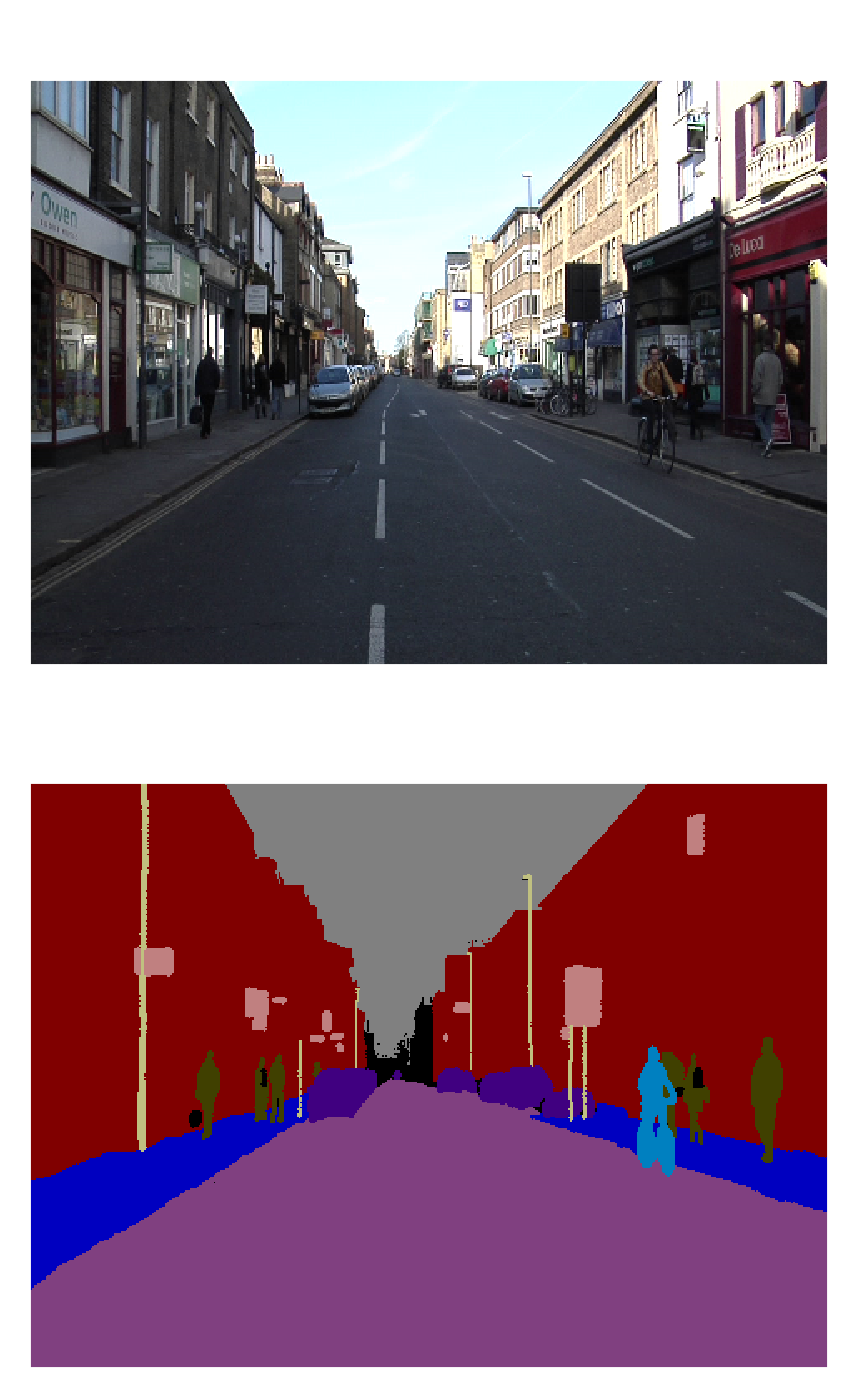

In [6]:
# get the next X, y training tuple
X, y = next(generators['train'])
# transform the onehot vector to an image
y = camvid11.unmap(y)
# plot the images
camvid.plot(X=X[0], y=y[0], order=['X', 'y'])

In [7]:
# build the model for the image shape and number of labels
model = segnet.build_segnet((*crop_size, 3), camvid11.n, camvid11.class_weights)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
SegNet_input (InputLayer)    (None, 352, 480, 3)       0         
_________________________________________________________________
pixel_norm (Lambda)          (None, 352, 480, 3)       0         
_________________________________________________________________
local_contrast_normalization (None, 352, 480, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 352, 480, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 352, 480, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 352, 480, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 352, 480, 64)      36928     
__________

In [8]:
# # create the callbacks for the training procedure
# callbacks = [
#     EarlyStopping(monitor='loss', patience=10),
#     LearningRateScheduler(lambda _, lr: 0.95 * lr),
#     ModelCheckpoint(weights_file, 
#         monitor='val_categorical_accuracy', 
#         save_best_only=True, 
#         save_weights_only=True, 
#         mode='max',
#     ),
#     PlotMetrics(),
# ]

In [9]:
# # fit the model with the data. divide the steps per epoch by the 
# # batch size (which is 3 in this case)
# history = model.fit_generator(generators['train'],
#     epochs=100,
#     steps_per_epoch=int(367 / batch_size),
#     validation_data=generators['val'],
#     validation_steps=101,
#     callbacks=callbacks,
#     verbose=0
# )

In [10]:
# history_to_results(history)

## Load Best Model

In [11]:
model.load_weights(weights_file)

# Test Metrics

In [12]:
metrics = evaluate.evaluate(model, generators['test'], 233,
    mask=camvid11.class_mask, 
    label_map=camvid11.label_to_discrete_map
)
metrics

100%|██████████| 233/233 [00:47<00:00,  4.90step/s]


Test
Accuracy                 0.888987
Mean Per Class Accuracy  0.680884
Mean I/U                 0.565235
Bicyclist                0.403919
Building                 0.741694
Car                      0.654322
Column_Pole              0.227270
Fence                    0.353265
Pedestrian               0.414771
Road                     0.900536
Sidewalk                 0.760643
SignSymbol               0.181247
Sky                      0.886489
VegetationMisc           0.693428

In [13]:
print(tabulate(metrics, tablefmt='pipe', headers=('Metric', 'Value')))

| Metric                  |    Value |
|:------------------------|---------:|
| Accuracy                | 0.888987 |
| Mean Per Class Accuracy | 0.680884 |
| Mean I/U                | 0.565235 |
| Bicyclist               | 0.403919 |
| Building                | 0.741694 |
| Car                     | 0.654322 |
| Column_Pole             | 0.22727  |
| Fence                   | 0.353265 |
| Pedestrian              | 0.414771 |
| Road                    | 0.900536 |
| Sidewalk                | 0.760643 |
| SignSymbol              | 0.181247 |
| Sky                     | 0.886489 |
| VegetationMisc          | 0.693428 |


# Qualitative Results

### Train

In [14]:
X, y, p = predict.predict(model, generators['train'], camvid11)

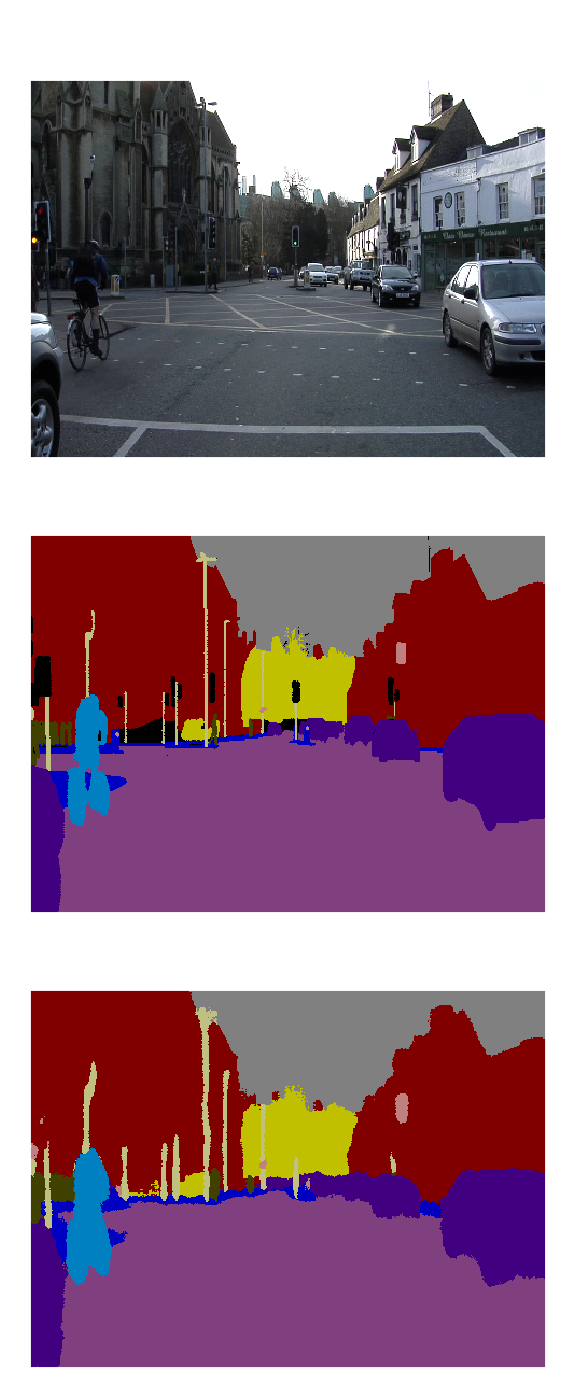

In [15]:
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

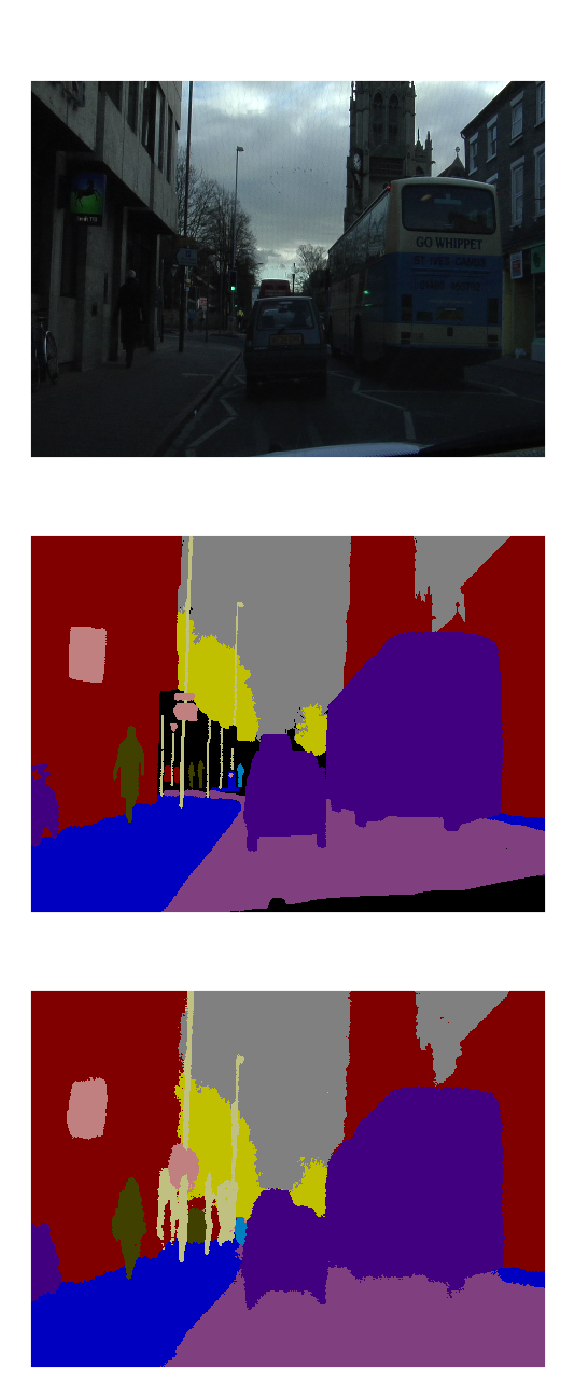

In [16]:
camvid.plot(X=X[1], y=y[1], y_pred=p[1], order=['X', 'y', 'y_pred'])

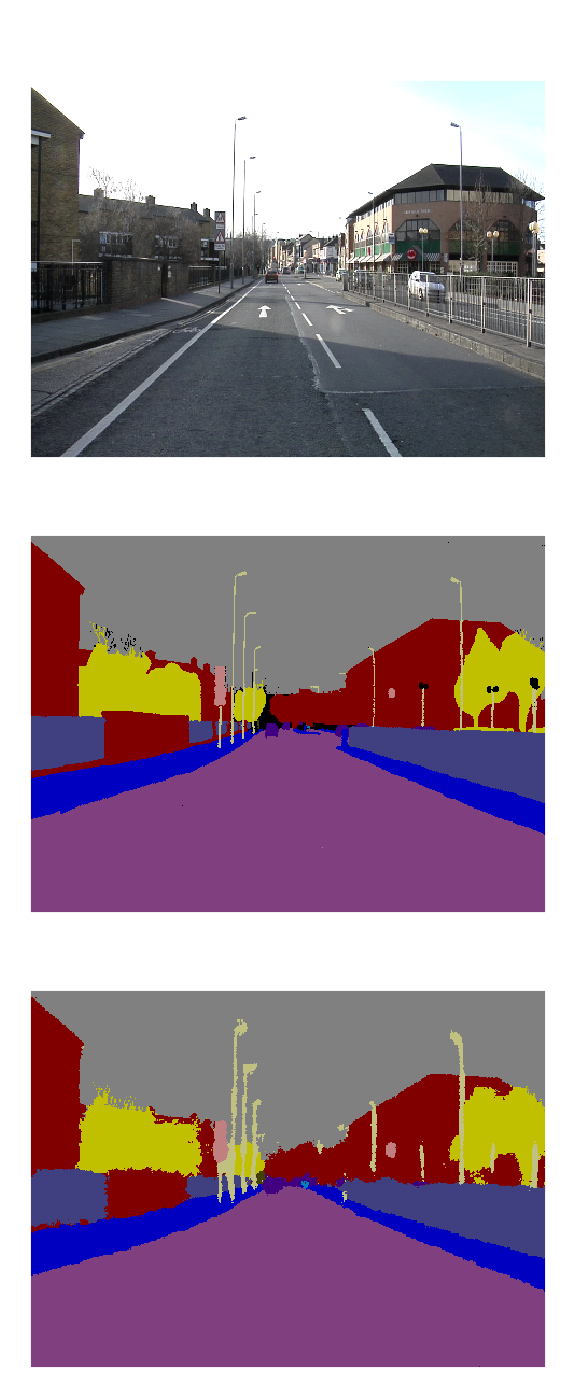

In [17]:
camvid.plot(X=X[2], y=y[2], y_pred=p[2], order=['X', 'y', 'y_pred'])

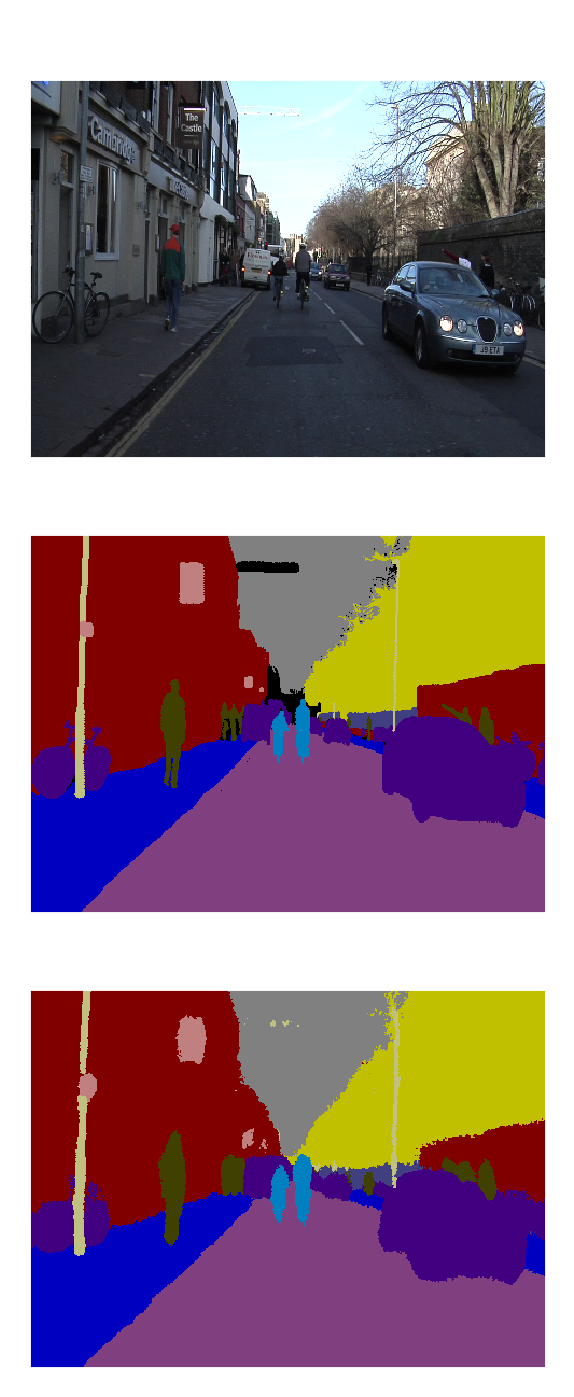

In [18]:
camvid.plot(X=X[3], y=y[3], y_pred=p[3], order=['X', 'y', 'y_pred'])

### Validation

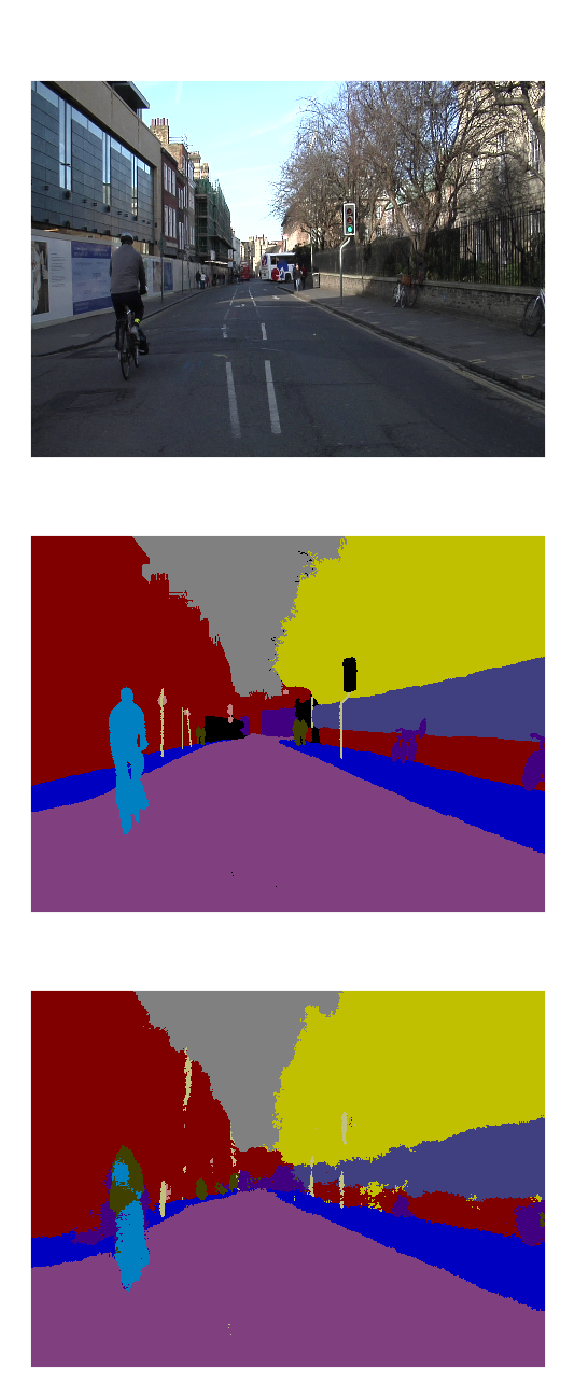

In [19]:
X, y, p = predict.predict(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

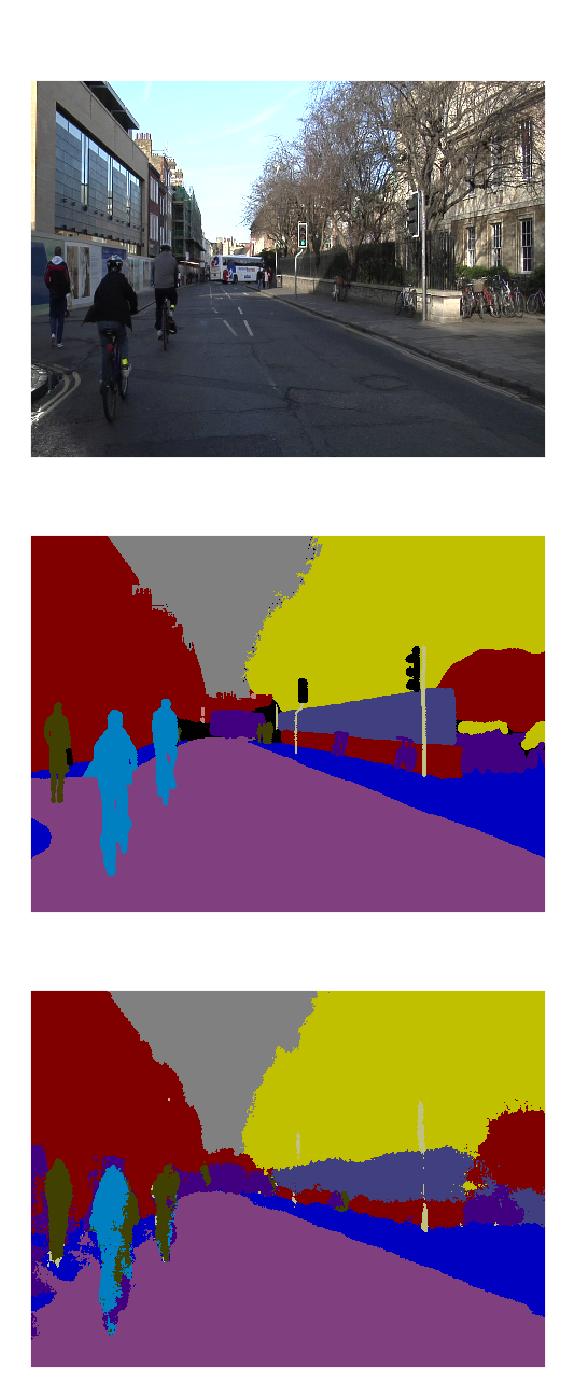

In [20]:
X, y, p = predict.predict(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

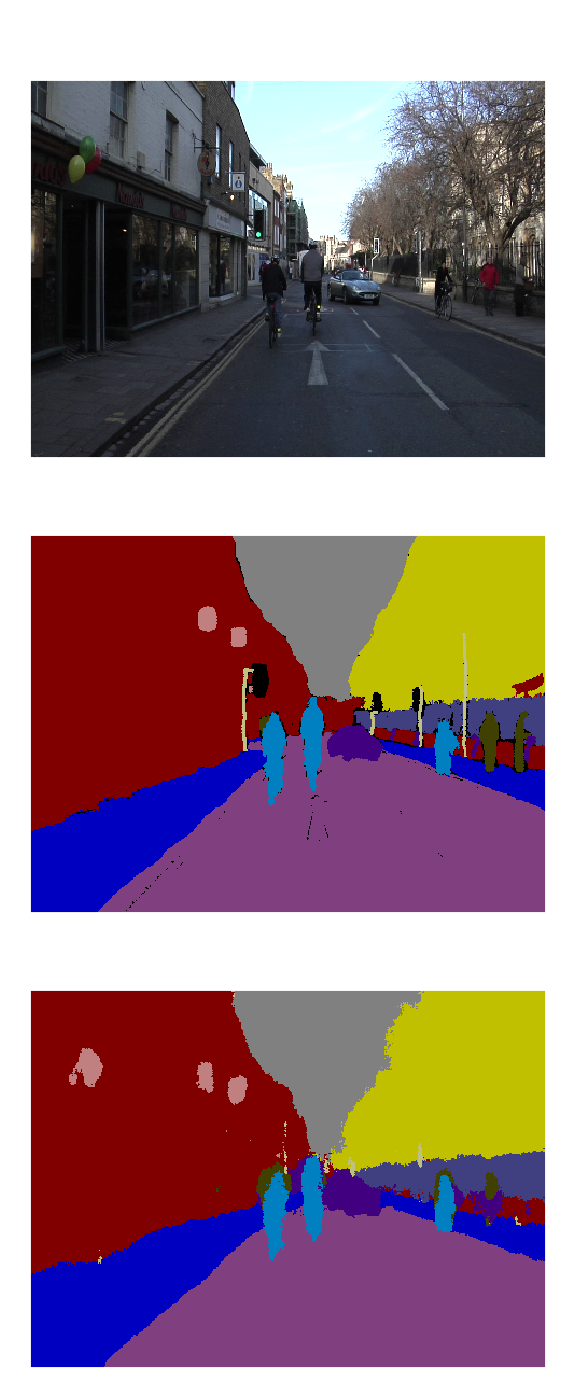

In [21]:
X, y, p = predict.predict(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

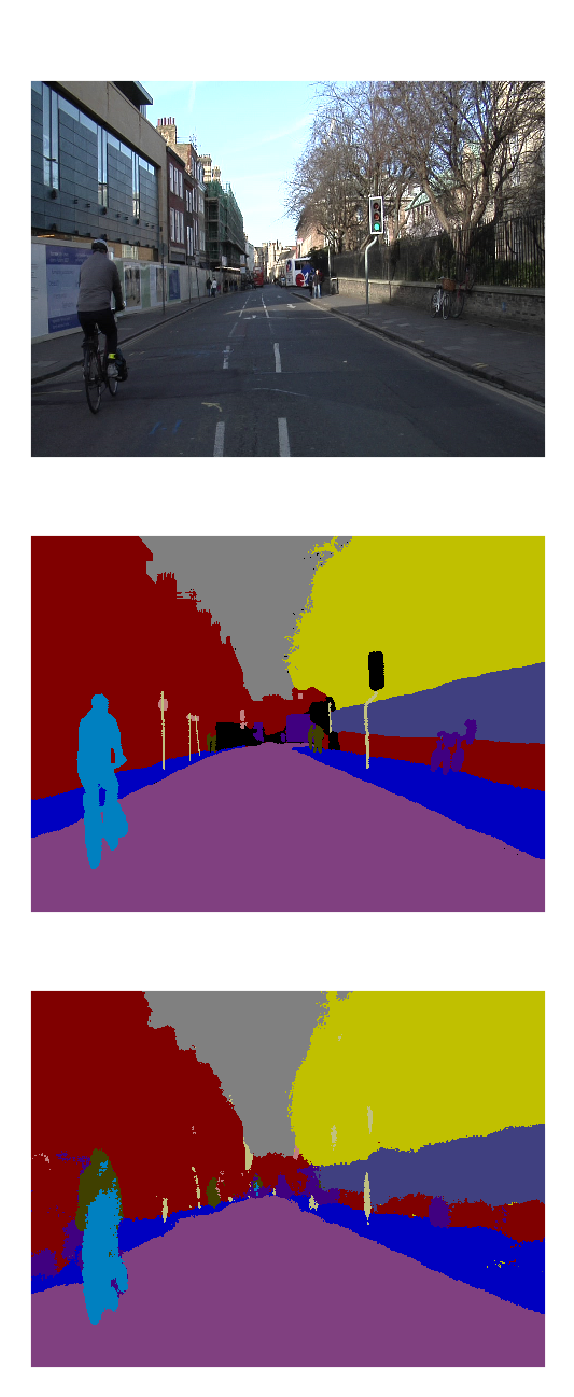

In [22]:
X, y, p = predict.predict(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

### Test

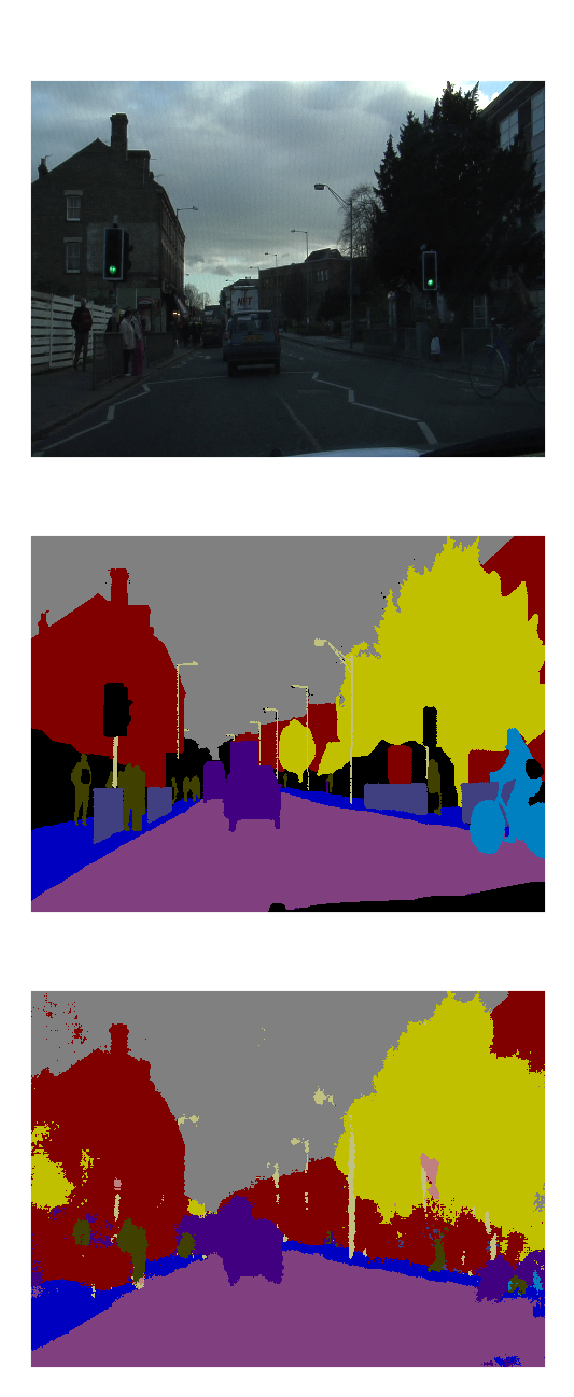

In [23]:
X, y, p = predict.predict(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

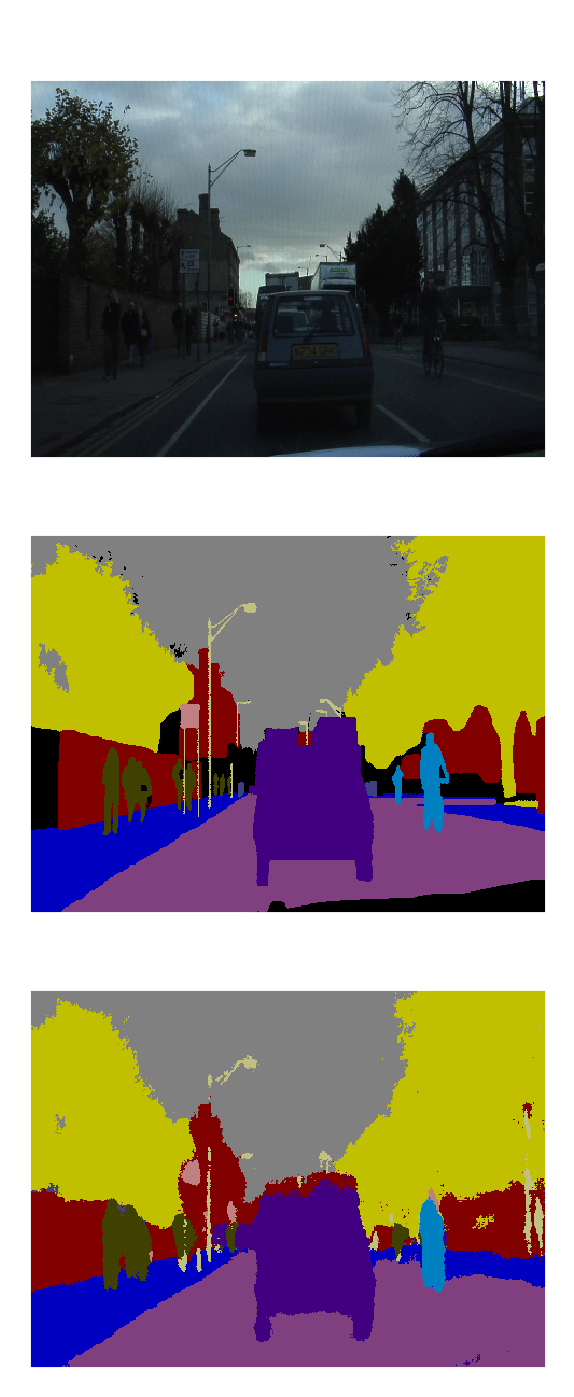

In [24]:
X, y, p = predict.predict(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

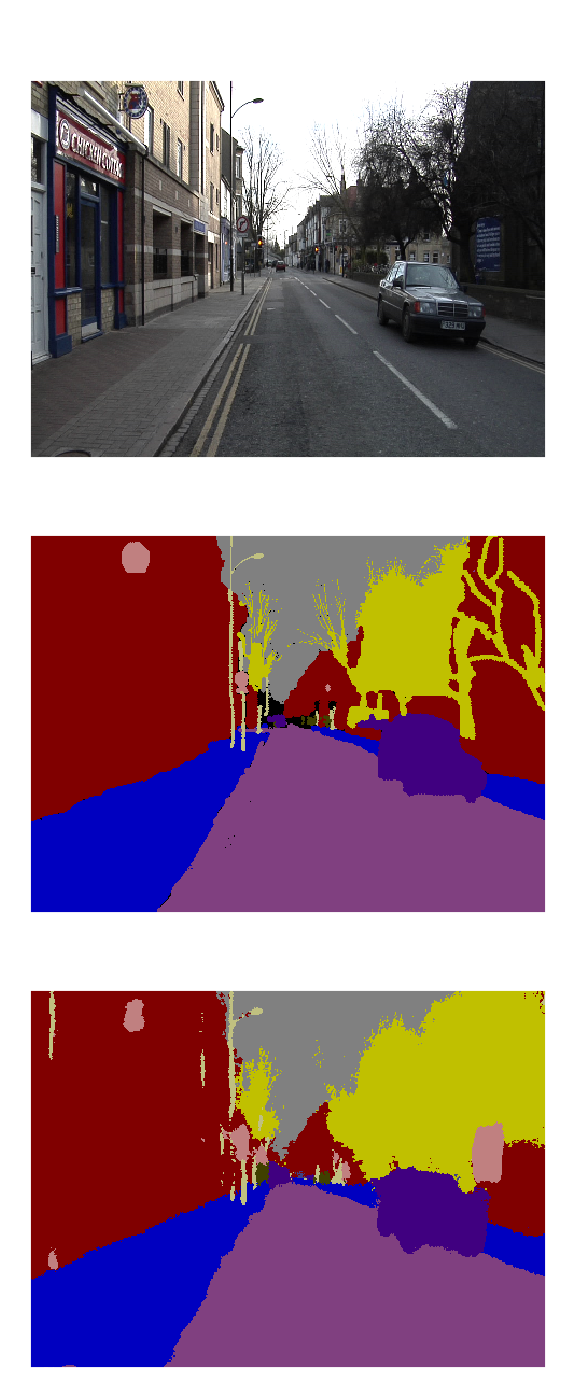

In [25]:
X, y, p = predict.predict(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

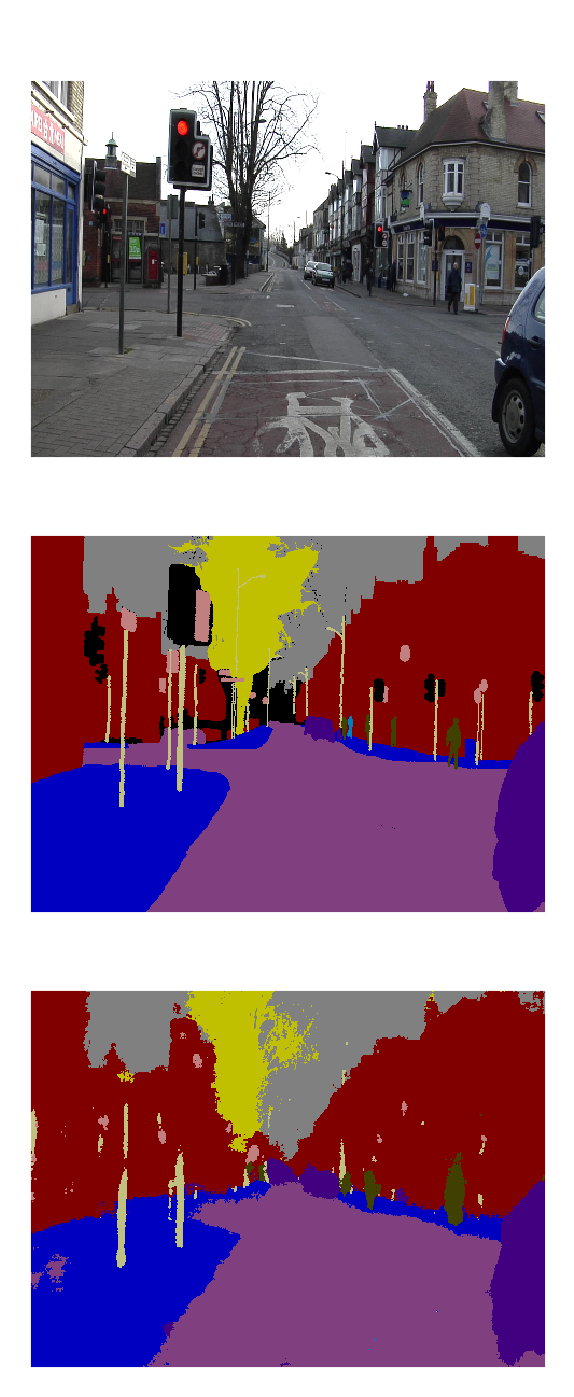

In [26]:
X, y, p = predict.predict(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])